In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

C:\Users\nolan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#Apprently this prevents "FutureWarning"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Importing the Dataset and Reorienting It

In [3]:
# Link = https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsHistorical

In [4]:
nhea_1960_2018 = pd.read_csv('NHE18_Summary.csv')

In [5]:
nhea_1960_2018 = nhea_1960_2018.set_index('Year')

In [6]:
nhea_1960_2018 = nhea_1960_2018.transpose()

In [7]:
# Convert Year to Datetime
nhea_1960_2018['Year'] = nhea_1960_2018['Year'].astype(float).astype(int)
nhea_1960_2018['Year'] = nhea_1960_2018['Year'].astype(str) + '-12-31'
nhea_1960_2018['Year'] = pd.to_datetime(nhea_1960_2018['Year'], infer_datetime_format=True)

In [8]:
# Create serperate dataframe using Year as index
indexed_dataset = nhea_1960_2018.set_index(['Year'])
indexed_dataset.tail(5)

Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),Health Consumption Expenditures,...,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),1U.S. Bureau of the Census. Census resident-based population less armed forces overseas and population of outlying areas.,"2U.S. Department of Commerce, Bureau of Economic Analysis.",NOTE: Numbers and percents may not add to totals because of rounding. Dollar amounts shown are in current dollars.,"SOURCE: Centers for Medicare & Medicaid Services, Office of the Actuary, National Health Statistics Group; U.S. Department of Commerce, Bureau of Economic Analysis; and U.S. Bureau of the Census."
Year,,,,,,,,,,,,,,,,,,,,,
2014-12-31,"3,025.40","2,875.60","2,556.00",237.5,82,149.8,317.9,"17,527.30",5.2,5.7,...,"9,047","8,042",747,258,471,17.3,NaN,NaN,NaN,NaN
2015-12-31,"3,199.60","3,045.50","2,710.20",249.4,85.8,154.1,320.1,"18,224.80",5.8,5.9,...,"9,514","8,466",779,268,481,17.6,NaN,NaN,NaN,NaN
2016-12-31,"3,347.40","3,190.70","2,838.30",263.7,88.7,156.7,322.5,"18,715.00",4.6,4.8,...,"9,893","8,800",818,275,486,17.9,NaN,NaN,NaN,NaN
2017-12-31,"3,487.30","3,319.00","2,954.50",273.2,91.4,168.3,324.6,"19,519.40",4.2,4,...,"10,224","9,101",841,281,518,17.9,NaN,NaN,NaN,NaN
2018-12-31,"3,649.40","3,475.00","3,075.50",306,93.5,174.4,326.6,"20,580.20",4.6,4.7,...,"10,638","9,415",937,286,534,17.7,NaN,NaN,NaN,NaN


### Removing the ,s from the numbers and making the floats

In [9]:
# Converting the columns to a string, removing the ,s from the numbers, and reconverting them to floats.
indexed_dataset['National Health Expenditures (Amount in Billions)'] = indexed_dataset['National Health Expenditures (Amount in Billions)'].astype(str)
indexed_dataset['National Health Expenditures (Amount in Billions)'] = indexed_dataset['National Health Expenditures (Amount in Billions)'].str.replace(',', '')
indexed_dataset['National Health Expenditures (Amount in Billions)'] = indexed_dataset['National Health Expenditures (Amount in Billions)'].astype(float)
indexed_dataset['U.S. Population1 (Millions)'] = indexed_dataset['U.S. Population1 (Millions)'].astype(str)
indexed_dataset['U.S. Population1 (Millions)'] = indexed_dataset['U.S. Population1 (Millions)'].str.replace(',', '')
indexed_dataset['U.S. Population1 (Millions)'] = indexed_dataset['U.S. Population1 (Millions)'].astype(float)

In [10]:
# No commas here, so just need to make it a float
indexed_dataset['National Health Expenditures (Annual Percent Change) '] = indexed_dataset['National Health Expenditures (Annual Percent Change) '].astype(float)

### Droping the first year for percent change reasons

In [11]:
# nhea_1960_2018 = nhea_1960_2018.iloc[1:]

### Making the cell worth graphing

In [12]:
# Converting the cost collumn to millions for simplicity sake
indexed_dataset['National Health Expenditures (Amount in Millions)'] = indexed_dataset['National Health Expenditures (Amount in Billions)'] * 1000

In [13]:
# Making the cost per person row
indexed_dataset['Healthcare Cost Per Person'] = indexed_dataset['National Health Expenditures (Amount in Millions)'] / indexed_dataset['U.S. Population1 (Millions)']

### Graaaaaaphs!

In [14]:
def plot_series(df, cols=None, title='Title', ylabel=None, xlabel=None):
    plt.figure(figsize=(20,16))

    plt.plot(df[cols])

    plt.title(title, fontsize=40)

    plt.ylabel(ylabel, fontsize=35)
    plt.yticks(fontsize=15)

    plt.xlabel(xlabel, fontsize=40)
    plt.xticks(
        ['1960-12-31', '1965-12-31', '1970-12-31', '1975-12-31', '1980-12-31', '1985-12-31', '1990-12-31', '1995-12-31', '2000-12-31', '2005-12-31', '2010-12-31', '2015-12-31'],
        [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
        fontsize=15
    );

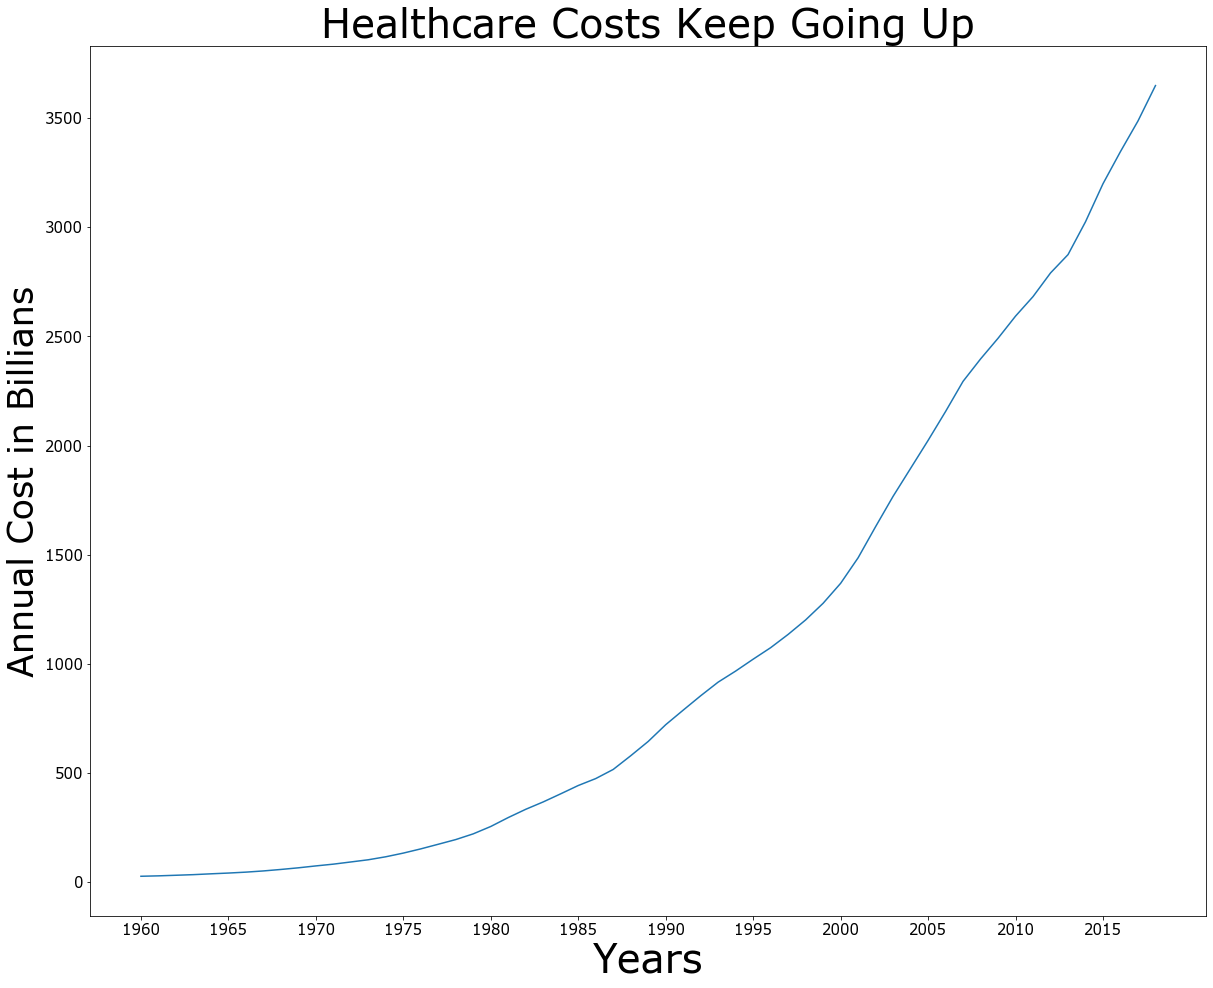

In [179]:
# Graph of Increase in Total Cost

plot_series(indexed_dataset, 'National Health Expenditures (Amount in Billions)', 
           'Healthcare Costs Keep Going Up', 
            'Annual Cost in Billians', 'Years')

In [16]:
# # Graph for Per Person

# plot_series(indexed_dataset, 'Healthcare Cost Per Person', 
#            'Per Person Increase Shows Similar Pattern', 
#             'Annual Cost of Healthcare Per Person', 'Years')

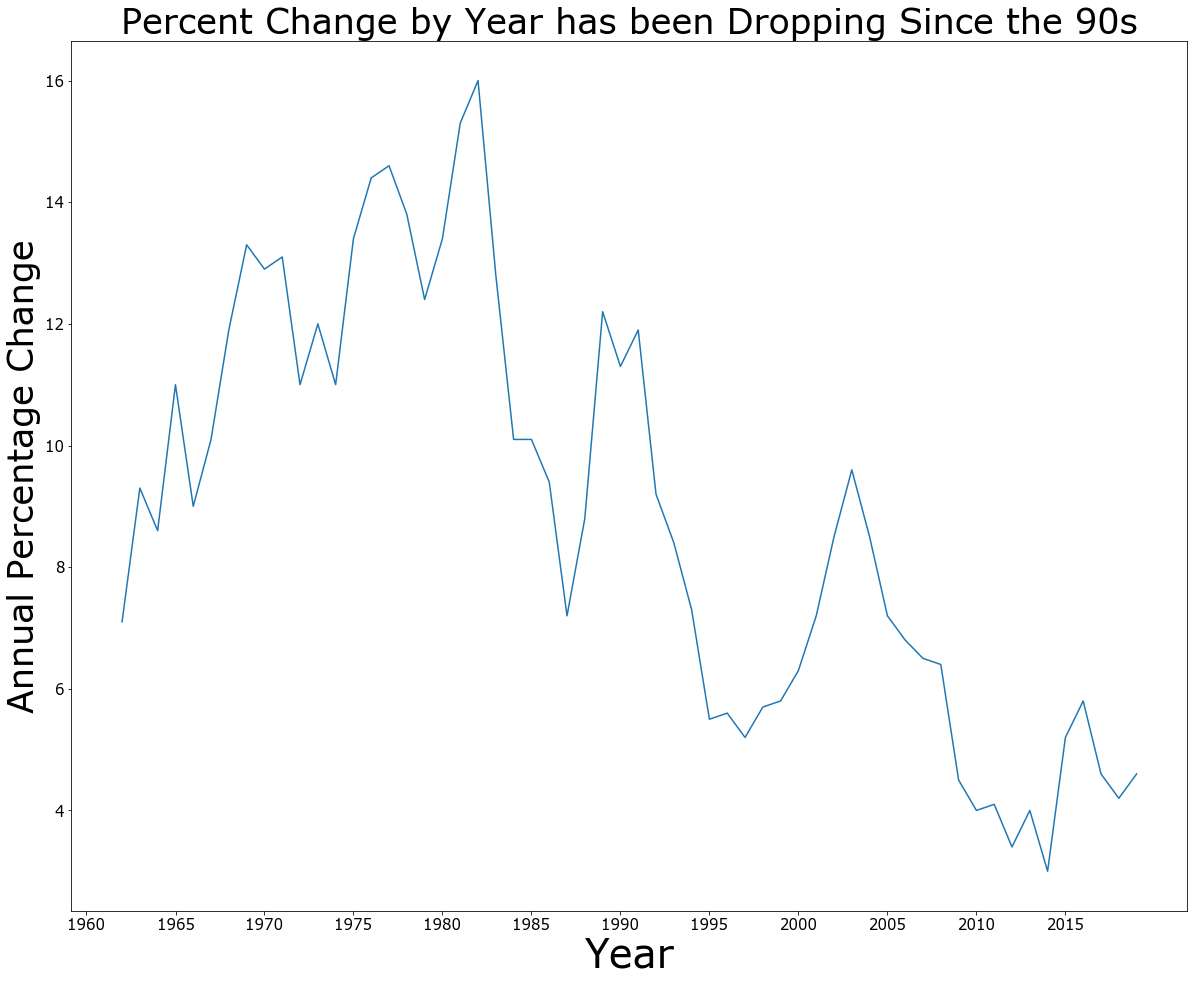

In [17]:
plt.figure(figsize=(20,16))

plt.plot(indexed_dataset['National Health Expenditures (Annual Percent Change) '])

plt.title('Percent Change by Year has been Dropping Since the 90s', fontsize=35)

plt.ylabel('Annual Percentage Change', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks(
    ['1960-01-01', '1965-01-01', '1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01', '1990-01-01', '1995-01-01', '2000-01-01', '2005-01-01', '2010-01-01', '2015-01-01'],
    [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15
);

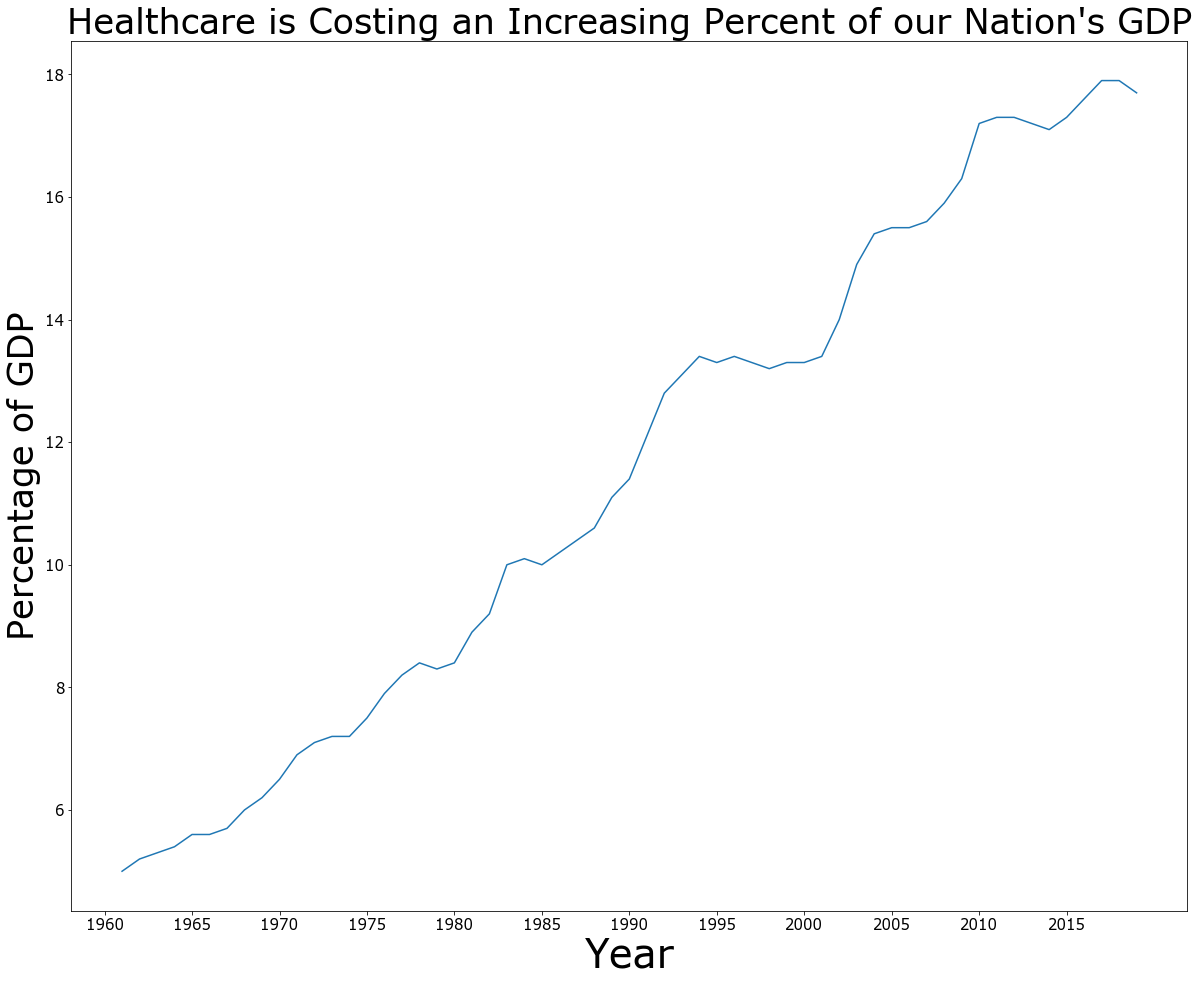

In [18]:
plt.figure(figsize=(20,16))

plt.plot(indexed_dataset['National Health Expenditures as a Percent of Gross Domestic Product (Percent)'])

plt.title("Healthcare is Costing an Increasing Percent of our Nation's GDP", fontsize=35)

# Hashtag these out to if info not relevent.

# plt.axvline('1996-08-21', label='Health Insurance Portability and Accountability Act', linestyle='dashdot', color='magenta')
# plt.axvline('1998-08-05', label='Balanced Bidget Act Enacted', linestyle='dashdot', color='green')
# plt.axvline('2000-01-01', label='Balanced Bidget Act Reversed', linestyle='dashed', color='green')
# plt.axvline('2003-12-08', label='Medical Modernization Act', linestyle='dashdot', color='red')
# plt.axvline('2010-03-23', label='Affordable Care Act', linestyle='dashdot', color='purple')
    
# plt.legend()

plt.ylabel('Percentage of GDP', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks(
    ['1960-01-01', '1965-01-01', '1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01', '1990-01-01', '1995-01-01', '2000-01-01', '2005-01-01', '2010-01-01', '2015-01-01'],
    [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15
);

In [19]:
# indexed_dataset.columns

### Prediction with Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Since year is the only variable we can input, we will have to do a seperate regression for each datapoint.
X = indexed_dataset.index.year
y_total = indexed_dataset[['National Health Expenditures (Amount in Billions)']]
y_gdp = indexed_dataset['National Health Expenditures as a Percent of Gross Domestic Product (Percent)']

In [22]:
# Not sure why trying to remove the comma made the 2 digit numbers turn null, but this stops that.
# y_total[10:] = y_total[10:].str.replace(',','')

In [23]:
# Change to float now that the commas are gone.
y_total = y_total.astype(float)
y_gdp = y_gdp.astype(float)

In [24]:
# X = X[30:]
# y_total = y_total[30:]

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [168]:
# Train test split time
X_train, X_test, y_train, y_test = train_test_split(X, y_gdp, test_size=0.5, shuffle=False)

In [169]:
# Reshaping to prevent 1D Array error in next step.
# X_train = X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [170]:
lr_gdp = LinearRegression()

lr_gdp.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
# X_test.astype(datetime)

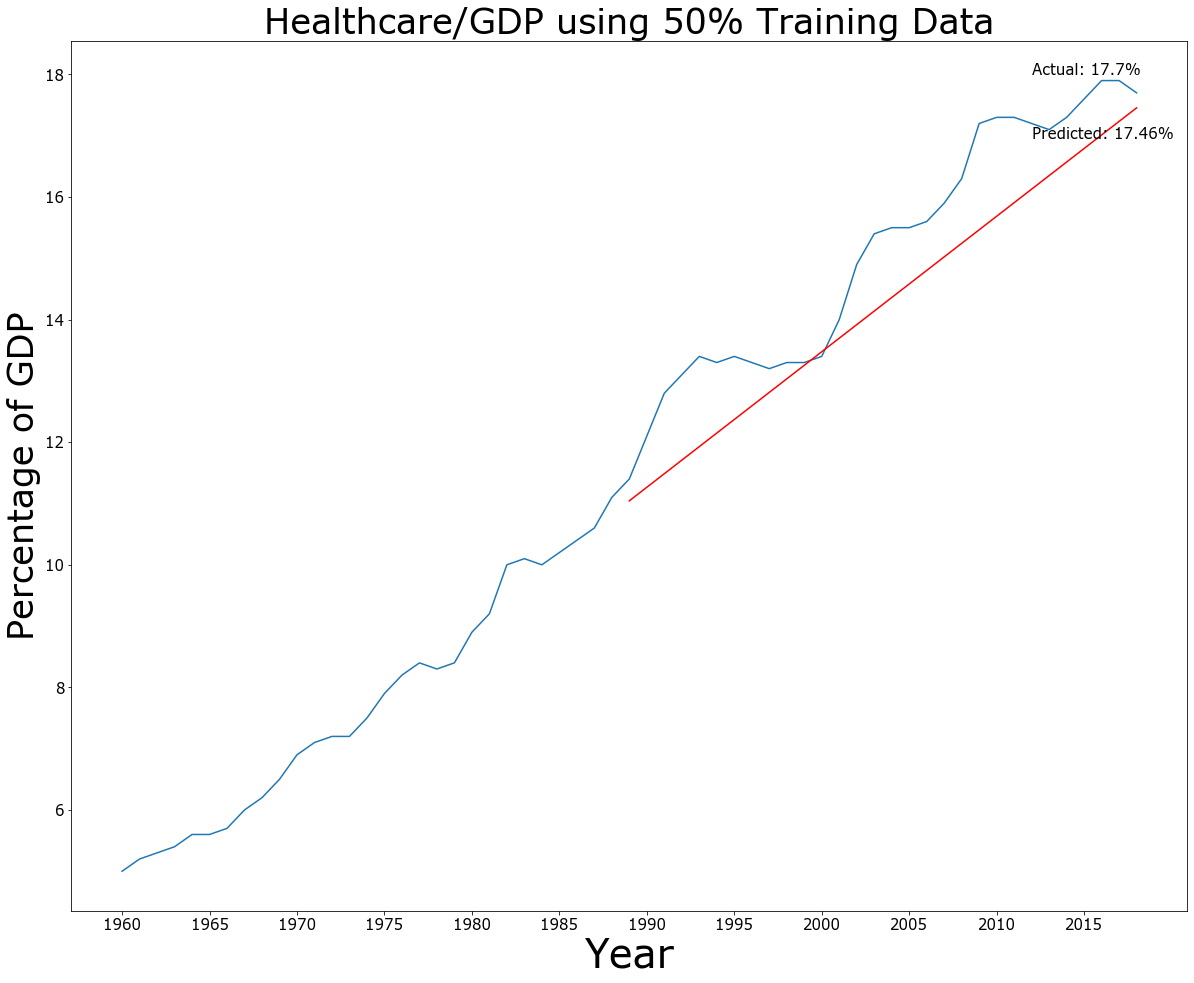

In [177]:
plt.figure(figsize=(20,16))

plt.title("Healthcare/GDP using 50% Training Data", fontsize=35)

plt.plot(X, y_gdp)
plt.plot(X_test, lr_gdp.predict(X_test), color='red')

plt.ylabel('Percentage of GDP', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15)

plt.text(2012, y_test[-1]+.3, f'Actual: {round(y_test[-1], 2)}%', fontsize=15)
plt.text(2012, lr_gdp.predict(X_test)[-1]-0.5, f'Predicted: {round(lr_gdp.predict(X_test)[-1], 2)}%', fontsize=15);

In [109]:
round(lr_gdp.predict(X_test)[-1], 2)

18.76

## Now To Predict The Future

In [77]:
# Year and None values to enable graph to look into the future
X_test_future = np.append(X_test, [[2019], [2020], [2021], [2022], [2023], [2024], [2025], [2026], [2027], [2028]])
X_future = np.append(X, [[2019], [2020], [2021], [2022], [2023], [2024], [2025], [2026], [2027], [2028]])
y_gdp_future = np.append(y_gdp, [[None], [None], [None], [None], [None], [None], [None], [None], [None], [None]])

In [78]:
X_test_future = X_test_future.reshape(-1, 1)
X_future = X_future.reshape(-1, 1)

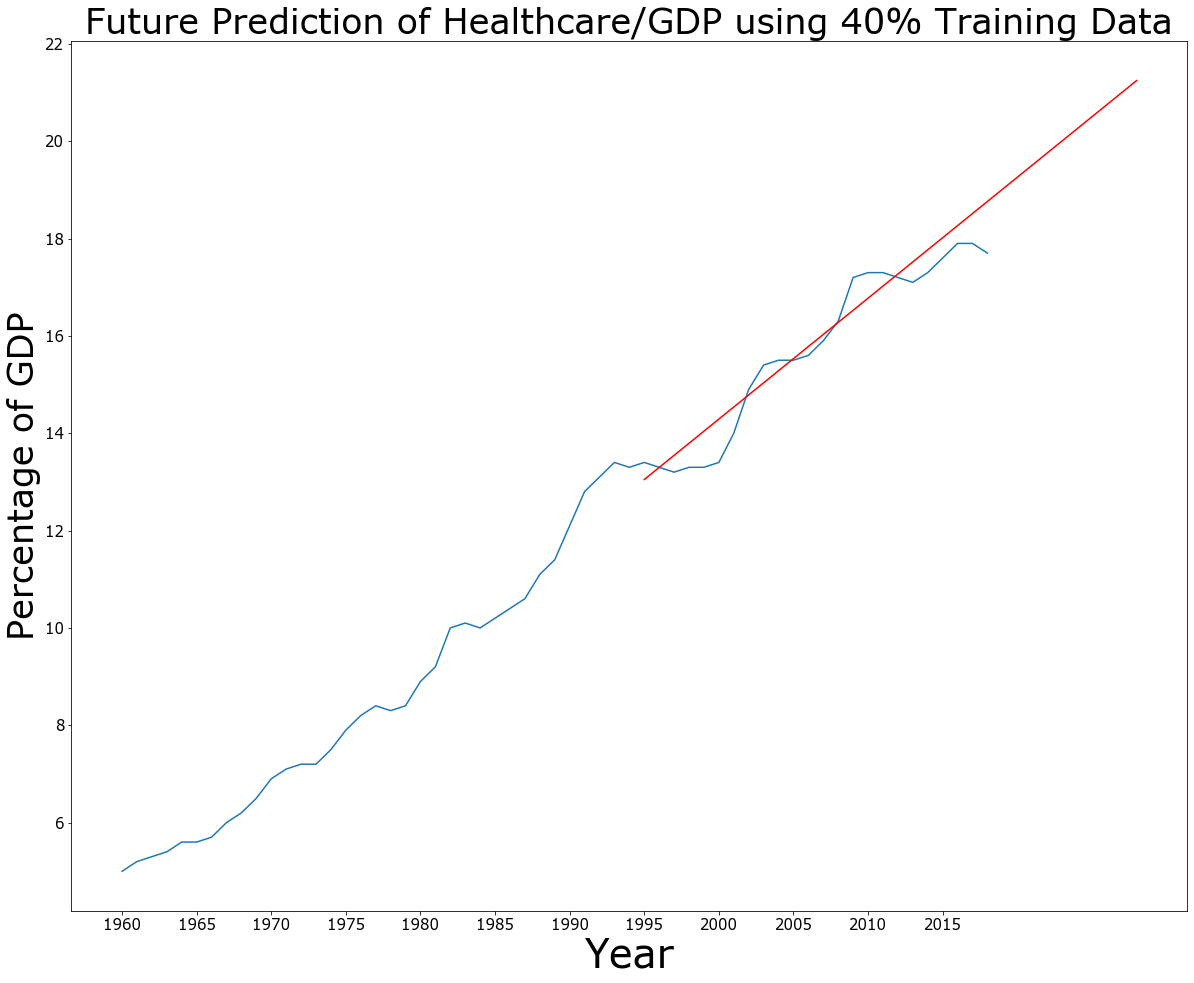

In [87]:
plt.figure(figsize=(20,16))

plt.title("Future Prediction of Healthcare/GDP using 40% Training Data", fontsize=35)

plt.plot(X_future, y_gdp_future)
plt.plot(X_test_future, lr_gdp.predict(X_test_future), color='red')


plt.ylabel('Percentage of GDP', fontsize=35)
plt.yticks(fontsize=15)

plt.xlabel('Year', fontsize=40)
plt.xticks([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015],
    fontsize=15
);